# Assignment 5 


Question 2 

In [31]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist 
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [32]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])      

In [35]:
import time
Wtbofore = time.time_ns()
cpubefore = time.process_time_ns()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7070 - accuracy: 0.7703 - val_loss: 0.4919 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4807 - accuracy: 0.8321 - val_loss: 0.4460 - val_accuracy: 0.8364
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4343 - accuracy: 0.8485 - val_loss: 0.4148 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4077 - accuracy: 0.8578 - val_loss: 0.4022 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3879 - accuracy: 0.8648 - val_loss: 0.3853 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3718 - accuracy: 0.8699 - val_loss: 0.4106 - val_accuracy: 0.8514
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3577 - accuracy: 0.8734 - val_loss: 0.3720 - val_accuracy:

In [36]:
print("Wall Time:",time.time_ns()-Wtbofore,"CPU Time:",time.process_time_ns()-cpubefore)

Wall Time: 132429985000 CPU Time: 203635742000


In [37]:
history.history

{'loss': [0.7069849371910095,
  0.4807242751121521,
  0.4342987835407257,
  0.40771639347076416,
  0.3879355192184448,
  0.3717952072620392,
  0.35768547654151917,
  0.34574782848358154,
  0.33503904938697815,
  0.3266058564186096,
  0.318092942237854,
  0.3099483251571655,
  0.3035784661769867,
  0.29586154222488403,
  0.28937554359436035,
  0.28312280774116516,
  0.2786770462989807,
  0.2726935148239136,
  0.2674940824508667,
  0.26226553320884705,
  0.2569624185562134,
  0.2533722221851349,
  0.24820978939533234,
  0.24354639649391174,
  0.24040493369102478,
  0.23509636521339417,
  0.23106466233730316,
  0.22859160602092743,
  0.2230951339006424,
  0.22066886723041534],
 'accuracy': [0.7703272700309753,
  0.8320727348327637,
  0.8484908938407898,
  0.8578181862831116,
  0.8648181557655334,
  0.8698909282684326,
  0.8733636140823364,
  0.8771454691886902,
  0.8802545666694641,
  0.8825272917747498,
  0.8864727020263672,
  0.8894727230072021,
  0.8909090757369995,
  0.893981814384460

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8818


[0.336497962474823, 0.8817999958992004]

In [40]:
X_new = X_test[:30]
y_proba = model.predict(X_test)
y_proba.round(2)

313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [41]:
# print(y_proba)
print(y_train)

[9 0 0 ... 9 0 2]


In [42]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [44]:
y_new = y_test[:30]
y_new

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3], dtype=uint8)

In [45]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score,recall_score
precision_recall_fscore_support(y_test, y_pred, average=None)
precision = precision_score(y_test, y_pred, average= None)
recall = recall_score(y_test, y_pred, average= None)
accuracy = accuracy_score(y_test,y_pred)
print("Precision Score: ",precision, "\nrecall", recall,"\nAccuracy Score",accuracy)


Precision Score:  [0.76744186 0.99178645 0.82489451 0.89521872 0.81570681 0.96031746
 0.70569948 0.9441675  0.9612326  0.95987964] 
recall [0.891 0.966 0.782 0.88  0.779 0.968 0.681 0.947 0.967 0.957] 
Accuracy Score 0.8818


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.89      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.78      0.80      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.82      0.78      0.80      1000
      Sandal       0.96      0.97      0.96      1000
       Shirt       0.71      0.68      0.69      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Question 3 
create a convolution neural network using the Fashion MNIST network

In [47]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [48]:
images.shape

TensorShape([2, 70, 120, 3])

In [49]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [50]:
fmaps.shape

TensorShape([2, 64, 114, 32])

In [51]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same")
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 70, 120, 32])

In [52]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [53]:
biases.shape

(32,)

In [54]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [55]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 256)        

In [56]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [57]:
Wtbofore2 = time.time_ns()
cpubefore2 = time.process_time_ns()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 401s 232ms/step - loss: 0.7936 - accuracy: 0.7199 - val_loss: 0.4022 - val_accuracy: 0.8600
Epoch 2/10
1719/1719 [==============================] - 406s 236ms/step - loss: 0.4375 - accuracy: 0.8537 - val_loss: 0.3102 - val_accuracy: 0.8912
Epoch 3/10
1719/1719 [==============================] - 385s 224ms/step - loss: 0.3599 - accuracy: 0.8828 - val_loss: 0.3011 - val_accuracy: 0.8918
Epoch 4/10
1719/1719 [==============================] - 438s 255ms/step - loss: 0.3123 - accuracy: 0.8953 - val_loss: 0.3000 - val_accuracy: 0.8924
Epoch 5/10
1719/1719 [==============================] - 398s 231ms/step - loss: 0.2861 - accuracy: 0.9034 - val_loss: 0.2735 - val_accuracy: 0.9114
Epoch 6/10
1719/1719 [==============================] - 373s 217ms/step - loss: 0.2669 - accuracy: 0.9109 - val_loss: 0.2504 - val_accuracy: 0.9068
Epoch 7/10
1719/1719 [==============================] - 439s 256ms/step - loss: 0.2462 - accuracy: 0.9163 - val_

In [58]:
print("Wall Time:",time.time_ns()-Wtbofore2,"CPU Time:",time.process_time_ns()-cpubefore2)

Wall Time: 4141738726000 CPU Time: 11048070816000


In [59]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 22s 71ms/step - loss: 0.2944 - accuracy: 0.9024


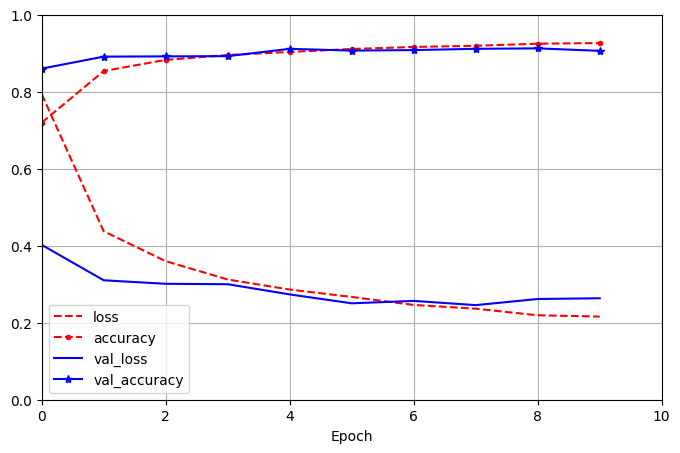

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 10], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [61]:
X_neww = X_test[:30]
y_proba2 = model.predict(X_test)
y_proba2.round(2)

313/313 [==============================] - 20s 63ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.17, 0.01, 0.02]], dtype=float32)

In [62]:
import numpy as np
y_pred2 = y_proba2.argmax(axis=-1)
y_pred2

array([9, 2, 1, ..., 8, 1, 5])

In [64]:
from sklearn.metrics import precision_recall_fscore_support
precision2 = precision_score(y_test, y_pred2, average= None)
recall2 = recall_score(y_test, y_pred2, average= None)
accuracy2 = accuracy_score(y_test,y_pred2)
print("Precision Score: ",precision, "\nrecall", recall,"\nAccuracy Score",accuracy)

Precision Score:  [0.76744186 0.99178645 0.82489451 0.89521872 0.81570681 0.96031746
 0.70569948 0.9441675  0.9612326  0.95987964] 
recall [0.891 0.966 0.782 0.88  0.779 0.968 0.681 0.947 0.967 0.957] 
Accuracy Score 0.8818


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.80      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.79      0.84      1000
       Dress       0.89      0.94      0.91      1000
        Coat       0.77      0.91      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.70      0.70      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.99      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

